In [2]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Importar el df limpio de Berlin, Germany.
df = pd.read_csv('Berlin_Clean.csv')
df

,id,listing_url,last_scraped,source,name,host_id,host_url,host_name,host_since,host_location,...,availability_90,availability_365,number_of_reviews,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,reviews_per_month
0,3176,https://www.airbnb.com/rooms/3176,2025-06-21,city scrape,Fabulous Flat in great Location,3718,https://www.airbnb.com/users/show/3718,Britta,2008-10-19,"Coledale, Australia",...,4,250,149,126,13230.0,4.63,4.52,4.92,4.61,0.76
1,9991,https://www.airbnb.com/rooms/9991,2025-06-21,city scrape,Geourgeous flat - outstanding views,33852,https://www.airbnb.com/users/show/33852,Philipp,2009-08-25,"Berlin, Germany",...,5,193,7,0,0.0,5.00,5.00,4.86,4.86,0.06
2,14325,https://www.airbnb.com/rooms/14325,2025-06-21,city scrape,Studio Apartment in Prenzlauer Berg,55531,https://www.airbnb.com/users/show/55531,Chris + Oliver,2009-11-18,"Berlin, Germany",...,0,262,26,0,0.0,4.68,4.85,4.60,4.45,0.14
3,16644,https://www.airbnb.com/rooms/16644,2025-06-21,previous scrape,In the Heart of Berlin - Kreuzberg,64696,https://www.airbnb.com/users/show/64696,Rene,2009-12-20,"Santa Cruz, CA",...,0,0,48,0,0.0,4.72,4.86,4.67,4.71,0.26
4,17904,https://www.airbnb.com/rooms/17904,2025-06-21,city scrape,Beautiful Kreuzberg studio - 3 months minimum,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, Brazil",...,17,111,298,0,0.0,4.77,4.71,4.88,4.65,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14182,1446408006383528333,https://www.airbnb.com/rooms/1446408006383528333,2025-06-20,city scrape,cozy room,420514457,https://www.airbnb.com/users/show/420514457,H,2021-08-28,"Berlin, Germany",...,90,365,0,0,0.0,0.00,0.00,0.00,0.00,0.00
14183,1446861918532076953,https://www.airbnb.com/rooms/1446861918532076953,2025-06-20,city scrape,Beautiful 1-Bedroom Apartment in Wedding,595670462,https://www.airbnb.com/users/show/595670462,Philipp,2024-08-12,"Berlin, Germany",...,80,355,0,0,0.0,0.00,0.00,0.00,0.00,0.00
14184,1446862242596527946,https://www.airbnb.com/rooms/1446862242596527946,2025-06-20,city scrape,Stunning Studio in Wedding,595670462,https://www.airbnb.com/users/show/595670462,Philipp,2024-08-12,"Berlin, Germany",...,89,364,0,0,0.0,0.00,0.00,0.00,0.00,0.00
14185,1446993798027111825,https://www.airbnb.com/rooms/1446993798027111825,2025-06-20,city scrape,Gemütliches Boot mit Seeblick,569536089,https://www.airbnb.com/users/show/569536089,Tatjana,2024-03-29,"Berlin, Germany",...,79,354,0,0,0.0,0.00,0.00,0.00,0.00,0.00


In [4]:
# Checar Na's
df.isnull().sum()

id                              0
listing_url                     0
last_scraped                    0
source                          0
name                            0
host_id                         0
host_url                        0
host_name                       0
host_since                      0
host_location                   0
host_response_time              0
host_response_rate              0
host_acceptance_rate            0
host_is_superhost               0
host_neighbourhood              0
host_listings_count             0
host_total_listings_count       0
host_verifications              0
host_has_profile_pic            0
host_identity_verified          0
neighbourhood                   0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       0
bathrooms_text

In [5]:
# Información del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14187 entries, 0 to 14186
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            14187 non-null  int64  
 1   listing_url                   14187 non-null  object 
 2   last_scraped                  14187 non-null  object 
 3   source                        14187 non-null  object 
 4   name                          14187 non-null  object 
 5   host_id                       14187 non-null  int64  
 6   host_url                      14187 non-null  object 
 7   host_name                     14187 non-null  object 
 8   host_since                    14187 non-null  object 
 9   host_location                 14187 non-null  object 
 10  host_response_time            14187 non-null  object 
 11  host_response_rate            14187 non-null  float64
 12  host_acceptance_rate          14187 non-null  float64
 13  h

In [6]:
# Latitude and Longitude serán excluidos para el rango IQR, debido a que son coordenadas geográficas.
## Primero corregir formato de algunas columnas
df['id'] = df['id'].astype(str)
df['host_id'] = df['host_id'].astype(str)
df['last_scraped'] = pd.to_datetime(df['last_scraped'], errors = 'coerce')
df['host_since'] = pd.to_datetime(df['host_since'], errors = 'coerce')

# Corroborar cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14187 entries, 0 to 14186
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            14187 non-null  object        
 1   listing_url                   14187 non-null  object        
 2   last_scraped                  14187 non-null  datetime64[ns]
 3   source                        14187 non-null  object        
 4   name                          14187 non-null  object        
 5   host_id                       14187 non-null  object        
 6   host_url                      14187 non-null  object        
 7   host_name                     14187 non-null  object        
 8   host_since                    14174 non-null  datetime64[ns]
 9   host_location                 14187 non-null  object        
 10  host_response_time            14187 non-null  object        
 11  host_response_rate          

In [7]:
# Separar el df por variables cualitativas y cuantitativas
cuantitativas = df.iloc[:, [11,12,15,16,27,28,30,31] + list(range(33,50))]
cualitativas = df.iloc[:, list(range(0,11)) + [13,14,29,32] + list(range(17,27))]

cuantitativas

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,availability_90,availability_365,number_of_reviews,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,reviews_per_month
0,100.00,80.00,1.0,1.0,2,1.0,1.0,2.0,105.000000,63,...,4,250,149,126,13230.0,4.63,4.52,4.92,4.61,0.76
1,50.00,0.00,1.0,1.0,7,2.5,4.0,4.0,135.000000,6,...,5,193,7,0,0.0,5.00,5.00,4.86,4.86,0.06
2,100.00,25.00,4.0,5.0,1,1.0,0.0,1.0,75.000000,150,...,0,262,26,0,0.0,4.68,4.85,4.60,4.45,0.14
3,100.00,0.00,4.0,4.0,4,1.0,1.0,2.0,173.672536,93,...,0,0,48,0,0.0,4.72,4.86,4.67,4.71,0.26
4,100.00,94.00,2.0,5.0,2,1.0,0.0,1.0,28.000000,92,...,17,111,298,0,0.0,4.77,4.71,4.88,4.65,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14182,90.00,60.00,2.0,2.0,1,1.0,1.0,1.0,74.000000,1,...,90,365,0,0,0.0,0.00,0.00,0.00,0.00,0.00
14183,100.00,63.00,70.0,70.0,3,1.0,1.0,1.0,68.000000,92,...,80,355,0,0,0.0,0.00,0.00,0.00,0.00,0.00
14184,100.00,63.00,70.0,70.0,2,1.0,1.0,1.0,86.000000,92,...,89,364,0,0,0.0,0.00,0.00,0.00,0.00,0.00
14185,88.88,89.89,1.0,2.0,4,1.0,1.0,2.0,74.000000,1,...,79,354,0,0,0.0,0.00,0.00,0.00,0.00,0.00


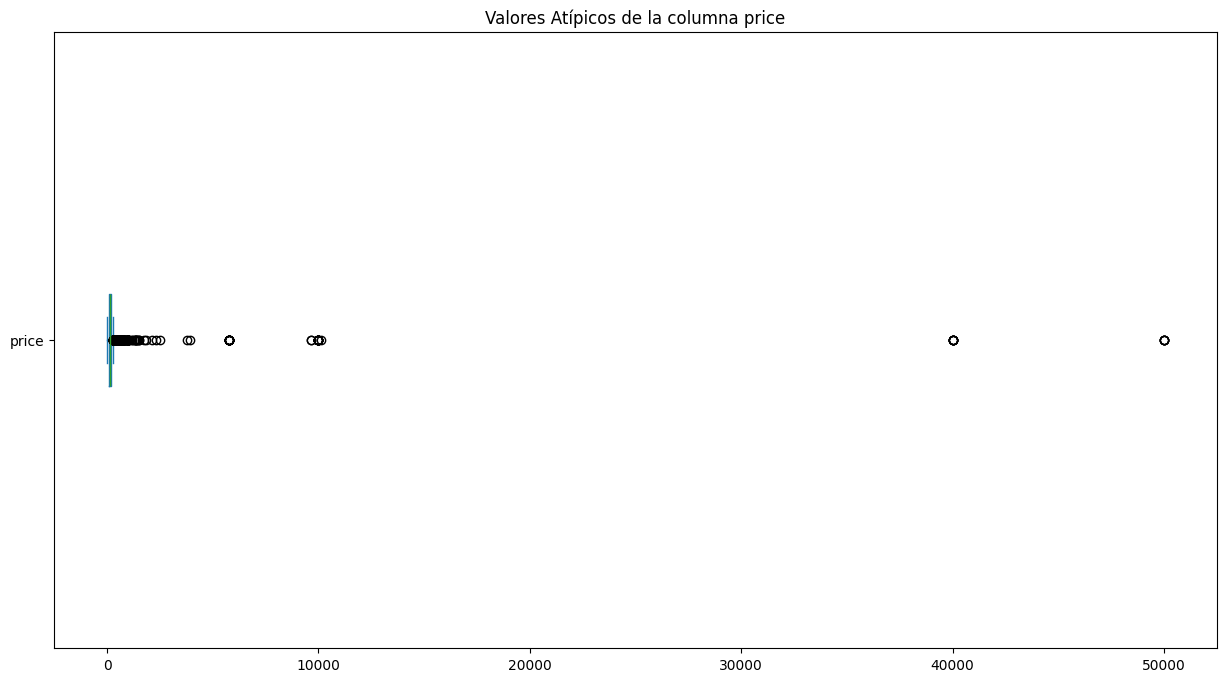

In [8]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuantitativas['price'].plot(kind='box', vert=False)
#cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos de la columna price")
plt.show() #dibujamos el diagrama

<Figure size 1500x800 with 0 Axes>

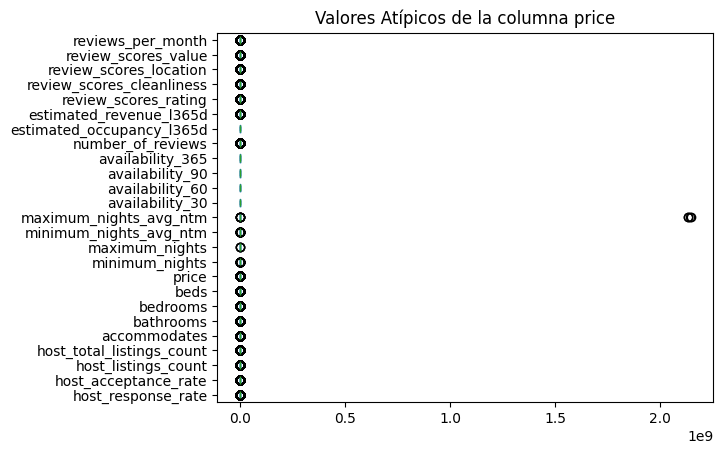

In [9]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos de la columna price")
plt.show() #dibujamos el diagrama

In [10]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_response_rate             116.680000
host_acceptance_rate           115.500000
host_listings_count             11.000000
host_total_listings_count       16.000000
accommodates                     7.000000
bathrooms                        1.000000
bedrooms                         1.000000
beds                             3.500000
price                          299.181341
minimum_nights                 227.000000
maximum_nights                2665.500000
minimum_nights_avg_ntm         227.000000
maximum_nights_avg_ntm        2542.500000
availability_30                 37.500000
availability_60                 90.000000
availability_90                152.500000
availability_365               675.000000
number_of_reviews               93.500000
estimated_occupancy_l365d      415.000000
estimated_revenue_l365d      38887.500000
review_scores_rating             6.532500
review_scores_cleanliness        7.075000
review_scores_location           6.325000
review_s

In [11]:
cuantitativas.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,availability_90,availability_365,number_of_reviews,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,reviews_per_month
count,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000,...,14187.000000,14187.000000,14187.000000,14187.000000,1.418700e+04,14187.000000,14187.000000,14187.000000,14187.000000,14187.000000
mean,89.459903,84.139256,25.603863,29.529922,3.045535,1.142313,1.306548,1.805667,192.474327,40.140692,...,31.372313,140.280257,42.945161,77.772891,1.132669e+04,3.634238,3.589533,3.636286,3.549572,0.969922
std,20.560183,23.849255,109.546072,130.390670,1.919730,0.483345,0.778510,1.440468,1343.298604,53.614919,...,33.225822,135.961767,98.019187,101.521664,3.389687e+04,2.045460,2.027402,2.043231,2.006185,1.835620
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,88.880000,88.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,90.000000,2.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000e+00,3.895000,3.500000,4.000000,3.450000,0.010000
50%,98.000000,89.890000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,115.000000,5.000000,...,19.000000,105.000000,7.000000,13.000000,1.258286e+03,4.750000,4.690000,4.750000,4.630000,0.240000
75%,100.000000,99.000000,5.000000,7.000000,4.000000,1.000000,1.000000,2.000000,173.672536,92.000000,...,61.000000,270.000000,38.000000,166.000000,1.555500e+04,4.950000,4.930000,4.930000,4.830000,1.240000
max,100.000000,100.000000,1607.000000,2083.000000,16.000000,15.000000,14.000000,50.000000,50000.000000,1125.000000,...,90.000000,365.000000,2877.000000,255.000000,1.471235e+06,5.000000,5.000000,5.000000,5.000000,50.070000


In [12]:
#Obtenemos datos limpios del Dataframe
df_iqr = cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df_iqr

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,availability_90,availability_365,number_of_reviews,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,reviews_per_month
0,100.00,80.00,1.0,1.0,2.0,1.0,1.0,2.0,105.000000,63.0,...,4,250,NaN,126,13230.0,4.63,4.52,4.92,4.61,0.76
1,NaN,NaN,1.0,1.0,7.0,NaN,NaN,NaN,135.000000,6.0,...,5,193,7.0,0,0.0,5.00,5.00,4.86,4.86,0.06
2,100.00,NaN,4.0,5.0,1.0,1.0,NaN,1.0,75.000000,150.0,...,0,262,26.0,0,0.0,4.68,4.85,4.60,4.45,0.14
3,100.00,NaN,4.0,4.0,4.0,1.0,1.0,2.0,173.672536,93.0,...,0,0,48.0,0,0.0,4.72,4.86,4.67,4.71,0.26
4,100.00,94.00,2.0,5.0,2.0,1.0,NaN,1.0,28.000000,92.0,...,17,111,NaN,0,0.0,4.77,4.71,4.88,4.65,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14182,90.00,NaN,2.0,2.0,1.0,1.0,1.0,1.0,74.000000,1.0,...,90,365,0.0,0,0.0,NaN,NaN,NaN,NaN,0.00
14183,100.00,NaN,NaN,NaN,3.0,1.0,1.0,1.0,68.000000,92.0,...,80,355,0.0,0,0.0,NaN,NaN,NaN,NaN,0.00
14184,100.00,NaN,NaN,NaN,2.0,1.0,1.0,1.0,86.000000,92.0,...,89,364,0.0,0,0.0,NaN,NaN,NaN,NaN,0.00
14185,88.88,89.89,1.0,2.0,4.0,1.0,1.0,2.0,74.000000,1.0,...,79,354,0.0,0,0.0,NaN,NaN,NaN,NaN,0.00


In [13]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos = df_iqr.isnull().sum()
valores_nulos

host_response_rate           1114
host_acceptance_rate         2319
host_listings_count          2139
host_total_listings_count    1973
accommodates                  505
bathrooms                    2415
bedrooms                     4162
beds                         1283
price                         595
minimum_nights                 38
maximum_nights                  3
minimum_nights_avg_ntm         36
maximum_nights_avg_ntm         10
availability_30                 0
availability_60                 0
availability_90                 0
availability_365                0
number_of_reviews            1858
estimated_occupancy_l365d       0
estimated_revenue_l365d      1072
review_scores_rating         3391
review_scores_cleanliness    3367
review_scores_location       3382
review_scores_value          3378
reviews_per_month            1322
dtype: int64

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
# Copia del dataframe
df_iqr_final = df_iqr.copy()

# Variables a imputar con MEDIANA
vars_mediana = [
    'accommodates','bathrooms','bedrooms','beds',
    'minimum_nights','maximum_nights',
    'minimum_nights_avg_ntm','maximum_nights_avg_ntm',
    'availability_30','availability_60','availability_90','availability_365',
    'number_of_reviews','estimated_occupancy_l365d',
    'price','estimated_revenue_l365d',
    'reviews_per_month','host_listings_count', 'host_total_listings_count']

# Variables a imputar con MEDIA
vars_media = [
    'host_response_rate','host_acceptance_rate',
    'review_scores_rating','review_scores_cleanliness',
    'review_scores_location','review_scores_value']

# Sustituir con Mediana
for col in vars_mediana:
    if col in df_iqr_final.columns:
        df_iqr_final[col] = df_iqr_final[col].fillna(df_iqr[col].median())

# Sustituir con Media
for col in vars_media:
    if col in df_iqr_final.columns:
        df_iqr_final[col] = df_iqr_final[col].fillna(df_iqr[col].mean())

df_iqr_final.isnull().sum()


host_response_rate           0
host_acceptance_rate         0
host_listings_count          0
host_total_listings_count    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
price                        0
minimum_nights               0
maximum_nights               0
minimum_nights_avg_ntm       0
maximum_nights_avg_ntm       0
availability_30              0
availability_60              0
availability_90              0
availability_365             0
number_of_reviews            0
estimated_occupancy_l365d    0
estimated_revenue_l365d      0
review_scores_rating         0
review_scores_cleanliness    0
review_scores_location       0
review_scores_value          0
reviews_per_month            0
dtype: int64

In [25]:
# Corroborar cambios
mediana_bath = df_iqr_final['bathrooms'].median()
print(mediana_bath)

mediana_price = df_iqr_final['price'].median()
print(mediana_price)

1.0
109.0


In [16]:
# Unimos el dataframe cuantitativo limpio con el dataframe cualitativo
Datos_limpios = pd.concat([cualitativas, df_iqr_final], axis=1)
Datos_limpios

,id,listing_url,last_scraped,source,name,host_id,host_url,host_name,host_since,host_location,...,availability_90,availability_365,number_of_reviews,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,reviews_per_month
0,3176,https://www.airbnb.com/rooms/3176,2025-06-21,city scrape,Fabulous Flat in great Location,3718,https://www.airbnb.com/users/show/3718,Britta,2008-10-19,"Coledale, Australia",...,4,250,5.0,126,13230.0,4.63000,4.520000,4.920000,4.610000,0.76
1,9991,https://www.airbnb.com/rooms/9991,2025-06-21,city scrape,Geourgeous flat - outstanding views,33852,https://www.airbnb.com/users/show/33852,Philipp,2009-08-25,"Berlin, Germany",...,5,193,7.0,0,0.0,5.00000,5.000000,4.860000,4.860000,0.06
2,14325,https://www.airbnb.com/rooms/14325,2025-06-21,city scrape,Studio Apartment in Prenzlauer Berg,55531,https://www.airbnb.com/users/show/55531,Chris + Oliver,2009-11-18,"Berlin, Germany",...,0,262,26.0,0,0.0,4.68000,4.850000,4.600000,4.450000,0.14
3,16644,https://www.airbnb.com/rooms/16644,2025-06-21,previous scrape,In the Heart of Berlin - Kreuzberg,64696,https://www.airbnb.com/users/show/64696,Rene,2009-12-20,"Santa Cruz, CA",...,0,0,48.0,0,0.0,4.72000,4.860000,4.670000,4.710000,0.26
4,17904,https://www.airbnb.com/rooms/17904,2025-06-21,city scrape,Beautiful Kreuzberg studio - 3 months minimum,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, Brazil",...,17,111,5.0,0,0.0,4.77000,4.710000,4.880000,4.650000,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14182,1446408006383528333,https://www.airbnb.com/rooms/1446408006383528333,2025-06-20,city scrape,cozy room,420514457,https://www.airbnb.com/users/show/420514457,H,2021-08-28,"Berlin, Germany",...,90,365,0.0,0,0.0,4.77028,4.705056,4.769782,4.656562,0.00
14183,1446861918532076953,https://www.airbnb.com/rooms/1446861918532076953,2025-06-20,city scrape,Beautiful 1-Bedroom Apartment in Wedding,595670462,https://www.airbnb.com/users/show/595670462,Philipp,2024-08-12,"Berlin, Germany",...,80,355,0.0,0,0.0,4.77028,4.705056,4.769782,4.656562,0.00
14184,1446862242596527946,https://www.airbnb.com/rooms/1446862242596527946,2025-06-20,city scrape,Stunning Studio in Wedding,595670462,https://www.airbnb.com/users/show/595670462,Philipp,2024-08-12,"Berlin, Germany",...,89,364,0.0,0,0.0,4.77028,4.705056,4.769782,4.656562,0.00
14185,1446993798027111825,https://www.airbnb.com/rooms/1446993798027111825,2025-06-20,city scrape,Gemütliches Boot mit Seeblick,569536089,https://www.airbnb.com/users/show/569536089,Tatjana,2024-03-29,"Berlin, Germany",...,79,354,0.0,0,0.0,4.77028,4.705056,4.769782,4.656562,0.00


In [17]:
# Verificar na's
Datos_limpios.isnull().sum()

id                               0
listing_url                      0
last_scraped                     0
source                           0
name                             0
host_id                          0
host_url                         0
host_name                        0
host_since                      13
host_location                    0
host_response_time               0
host_is_superhost                0
host_neighbourhood               0
bathrooms_text                   0
amenities                        0
host_verifications               0
host_has_profile_pic             0
host_identity_verified           0
neighbourhood                    0
neighbourhood_cleansed           0
neighbourhood_group_cleansed     0
latitude                         0
longitude                        0
property_type                    0
room_type                        0
host_response_rate               0
host_acceptance_rate             0
host_listings_count              0
host_total_listings_

In [18]:
# Convertir CSV
Datos_limpios.to_csv('Berlin_Final.csv')

<Figure size 1500x800 with 0 Axes>

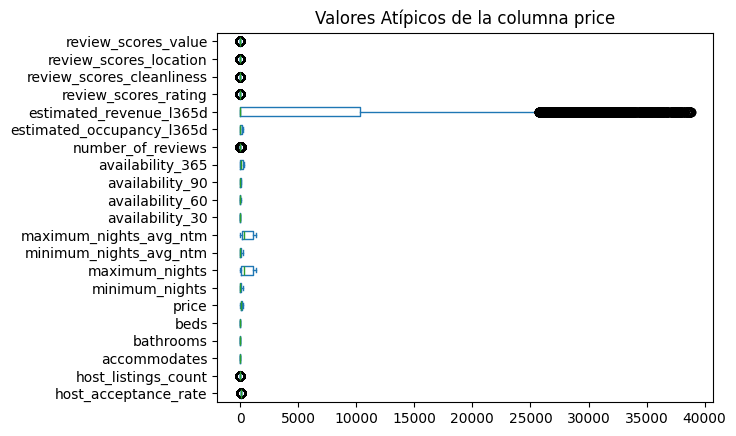

In [19]:
# Revisar nuevo df
df_berlin_final = pd.read_csv('Berlin_Final.csv')

# Separar el df por variables cualitativas y cuantitativas
cuantitativas_final = df_berlin_final.iloc[:, [11,12,15,16,27,28,30,31] + list(range(33,50))]
cualitativas_final = df_berlin_final.iloc[:, list(range(0,11)) + [13,14,29,32] + list(range(17,27))]

#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuantitativas_final.plot(kind='box', vert=False)
plt.title('Valores Atípicos de la columna price')
plt.show() #dibujamos el diagrama

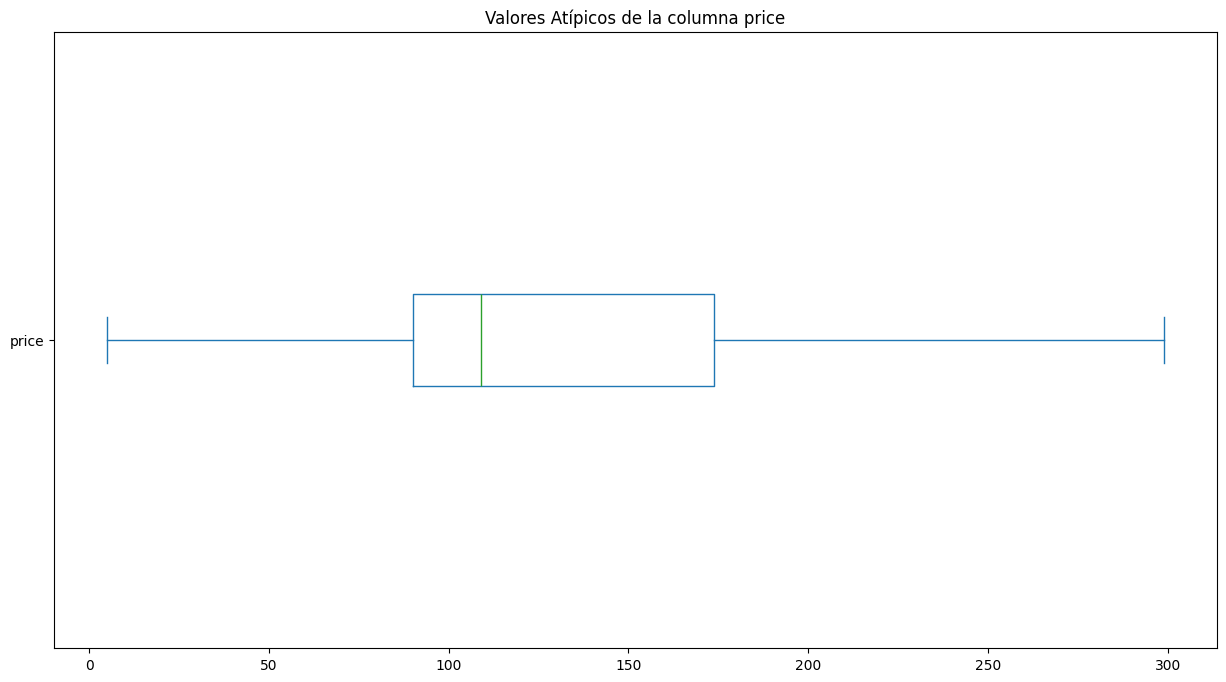

In [20]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuantitativas_final['price'].plot(kind='box', vert=False)
#cuantitativas.plot(kind='box', vert=False)
plt.title('Valores Atípicos de la columna price')
plt.show() #dibujamos el diagrama

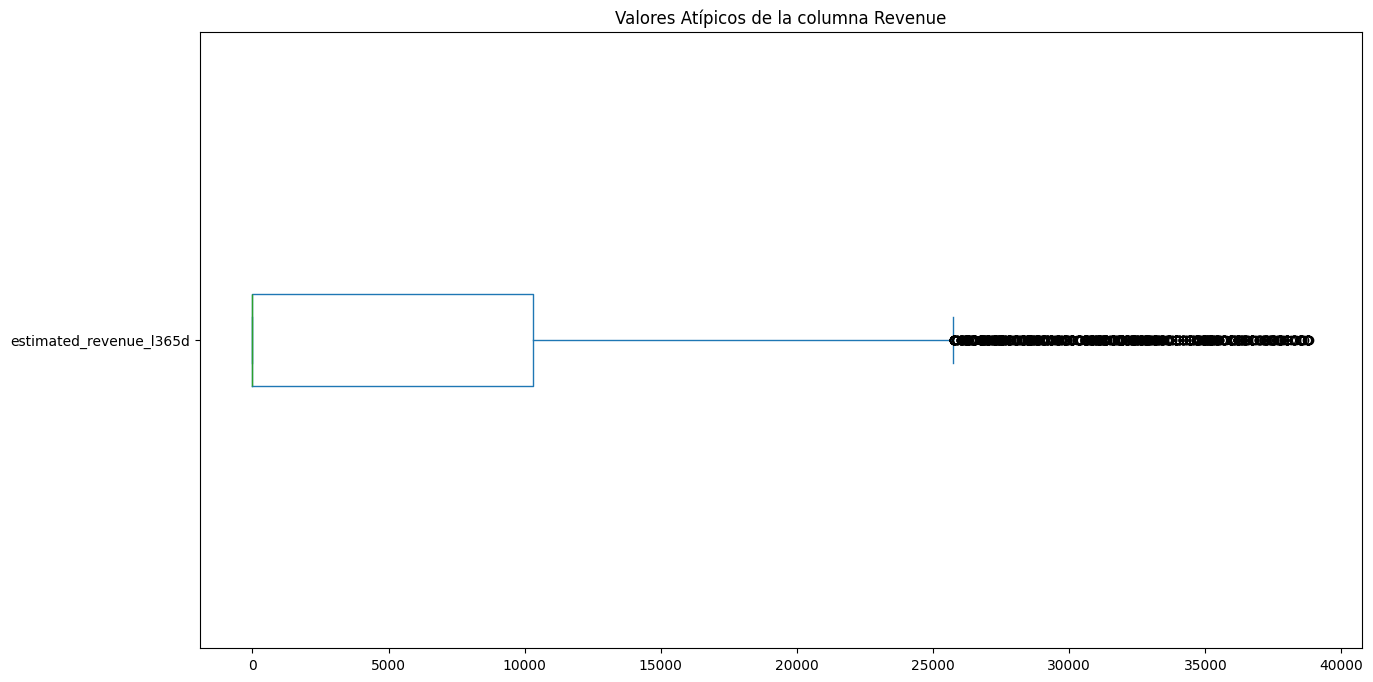

In [21]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuantitativas_final['estimated_revenue_l365d'].plot(kind='box', vert=False)
#cuantitativas.plot(kind='box', vert=False)
plt.title('Valores Atípicos de la columna Revenue')
plt.show() #dibujamos el diagrama